In [519]:
import networkx as nx
import re
import pylab
import warnings
warnings.filterwarnings("ignore")
#unnamed(1).graphml
tree = nx.read_graphml("unnamed.graphml")

In [524]:
def HV_Tree_Draw(G, root=None, width=1., vert_loc = 0, hor_loc = 0.):

    '''
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches 
    
    vert_loc: vertical location of root
    
    hor_loc: horizontal location of root
    '''
    def find_root(tree):
        for node in list(tree.nodes()):
            if len(list(tree.neighbors(node))) == len(list(nx.all_neighbors(tree, node))):
                return node
        
    if not nx.is_tree(G):
        raise TypeError('annot use hierarchy_pos on a graph that is not a tree')

    root = find_root(tree)
    def _hierarchy_pos(G, root, width=1., vert_loc = 0.5, hor_loc = 0.0, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
        if pos is None:
            pos = {root:(hor_loc, vert_loc)}
        else:
            pos[root] = (hor_loc, vert_loc)
        
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  

        if len(children)==2:
            if list(G.neighbors(children[0])) >= list(G.neighbors(children[1])):
                left = children[0]
                right = children[1]
            else:
                left = children[1]
                right = children[0]

            subtree_left = nx.dfs_tree(tree, source = left)
            subtree_right = nx.dfs_tree(tree, source = right)
            dx = len(subtree_right.nodes())
            dx_ = len(subtree_left.nodes())
            pos = _hierarchy_pos(G, left, width=width, 
                                    vert_loc=vert_loc-dx, hor_loc=hor_loc,
                                    pos=pos, parent=root)
            
            pos = _hierarchy_pos(G, right, width=width, 
                                    vert_loc=vert_loc, hor_loc=hor_loc+dx_,
                                    pos=pos, parent=root)
            

        if len(children)==1:
            child = children[0]
            if len(list(G.neighbors(child))) > 1:
                dx = len(list(G.neighbors(child))) #width / len(children)
                pos = _hierarchy_pos(G, child, width=width, 
                                    vert_loc=vert_loc, hor_loc=hor_loc + dx,
                                    pos=pos, parent=root)
            else:
                dx = width / len(children)
                pos = _hierarchy_pos(G, child, width=width, 
                                    vert_loc=vert_loc-width, hor_loc=hor_loc,
                                    pos=pos, parent=root)
        return pos
    

    return _hierarchy_pos(G, root, width, vert_loc, hor_loc)

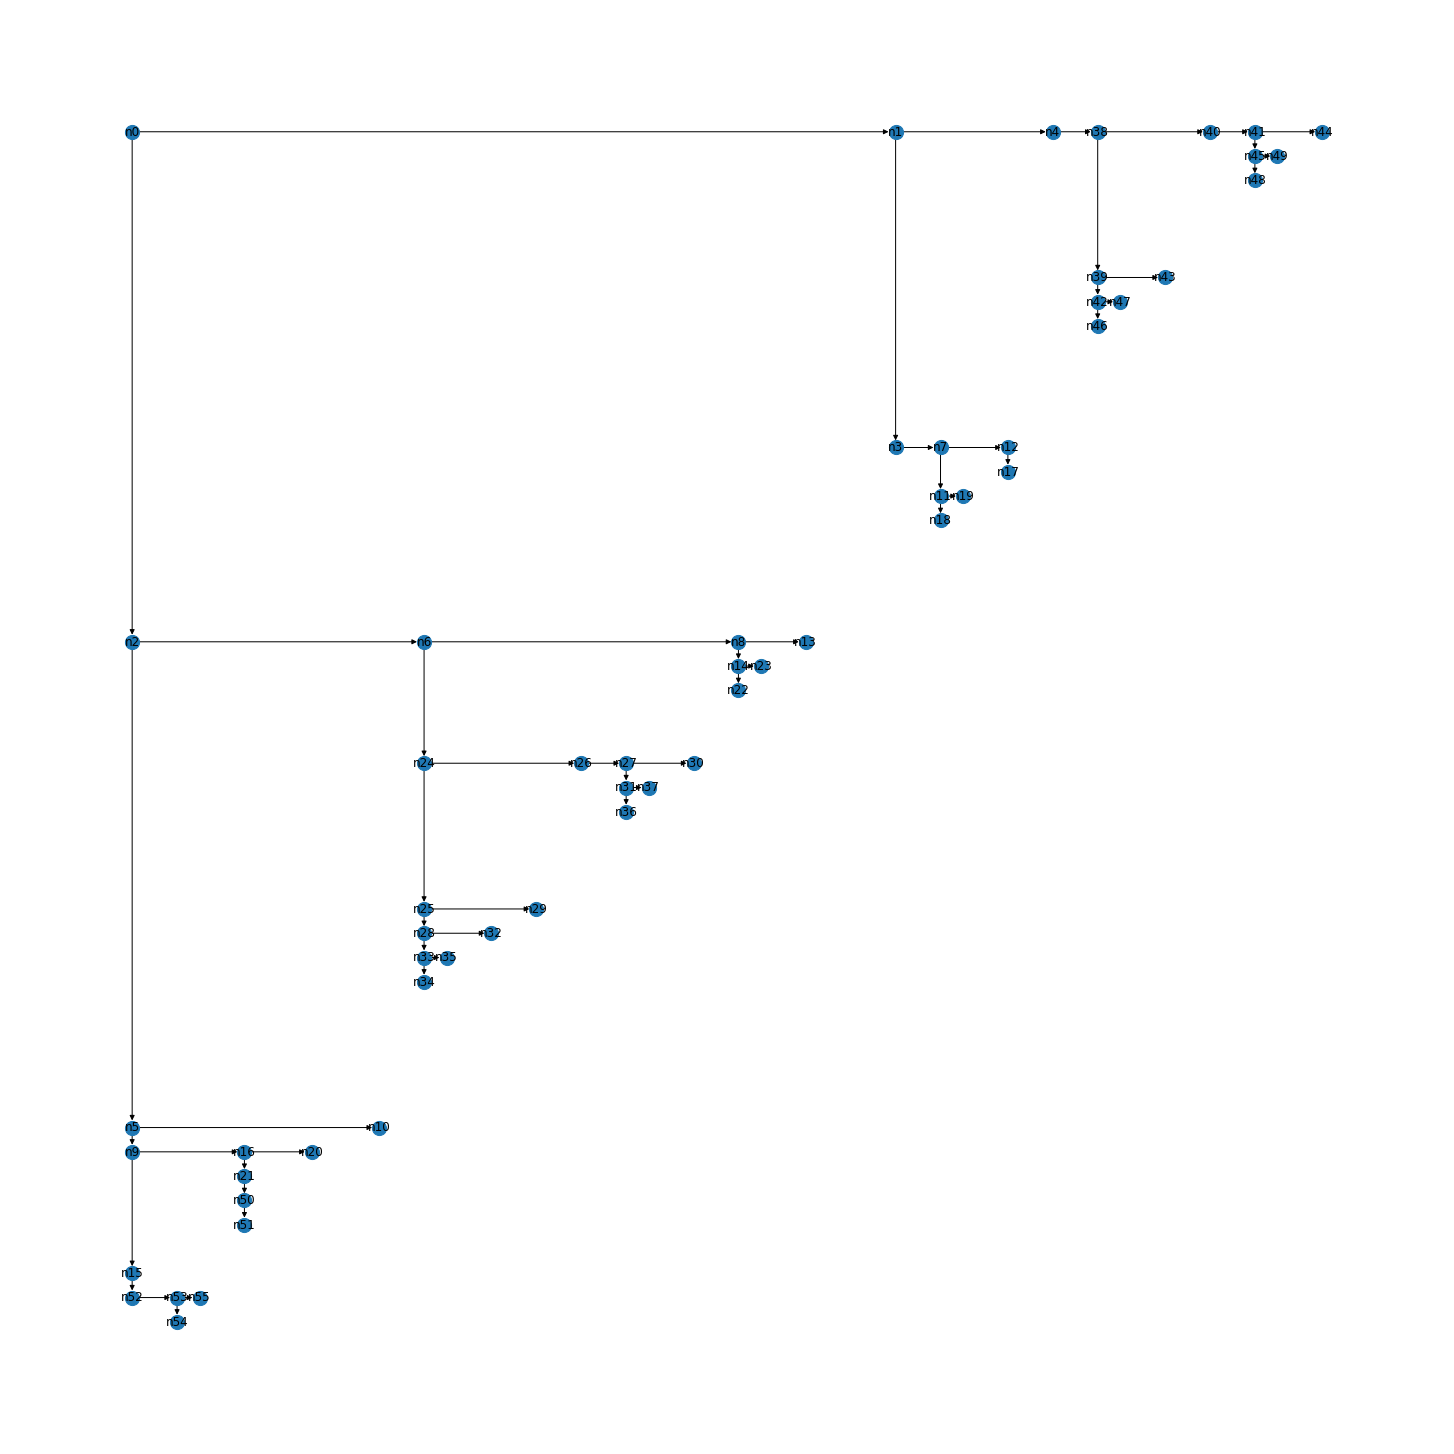

In [525]:
plt.figure(figsize=(20, 20))
pos = HV_Tree_Draw(tree)    
nx.draw(tree, pos=pos, with_labels=True, node_size=200)
pylab.show()